In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session





/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/races.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/constructor_results.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/drivers.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/constructors.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/lap_times.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/status.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/driver_standings.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/seasons.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/pit_stops.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/sprint_results.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/constructor_standings.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/results.csv
/kaggle/input/formula-one-racing-a-comprehensive-dat

In [4]:
circuits = pd.read_csv('/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/circuits.csv')
laptimes = pd.read_csv('/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/lap_times.csv')
pitstops = pd.read_csv('/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/pit_stops.csv')
seasons = pd.read_csv('/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/seasons.csv' , parse_dates = ['year'])
status = pd.read_csv('/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/status.csv')
constructor_standings = pd.read_csv('/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/constructor_standings.csv')
constructors = pd.read_csv('/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/constructors.csv')
driver_standings = pd.read_csv('/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/driver_standings.csv')
drivers = pd.read_csv('/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/drivers.csv')
races = pd.read_csv('/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/races.csv', parse_dates = ['year'])
constructor_results = pd.read_csv('/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/constructor_results.csv')
results = pd.read_csv('/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/results.csv')
qualifying = pd.read_csv('/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/qualifying.csv')

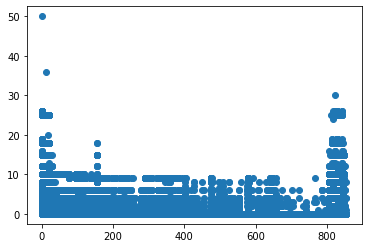

In [5]:
dataResult = pd.read_csv("/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/results.csv")
#print(dataResult)
plt.scatter(dataResult['driverId'], dataResult['points'])


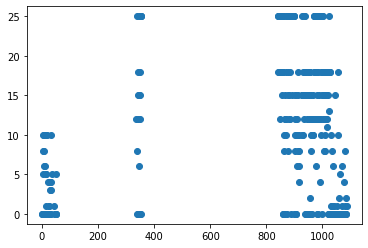

In [6]:
dataResultVettel = dataResult[dataResult['driverId'] == 20] # On choisit le pilote Vettel
plt.scatter(dataResultVettel['raceId'], dataResultVettel['points'])


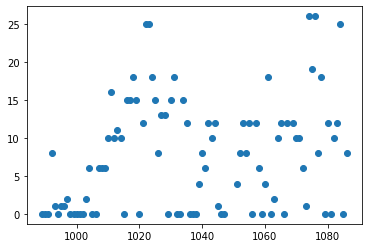

In [7]:
dataResultLeclerc = dataResult[dataResult['driverId'] == 844] # On choisit le pilote Leclerc
plt.scatter(dataResultLeclerc['raceId'], dataResultLeclerc['points'])

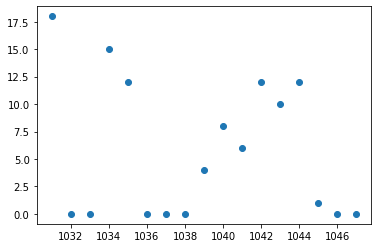

In [8]:
dataResultLeclerc = dataResult[dataResult['driverId'] == 844] # On choisit le pilote Leclerc
dataRace = pd.read_csv("/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/races.csv")
dataResultRaceLeclerc2020 = pd.merge(dataResultLeclerc,dataRace[['raceId', 'name', 'year', 'circuitId']],how='left',on='raceId')
dataResultRaceLeclerc2020 = dataResultRaceLeclerc2020[dataResultRaceLeclerc2020['year'] == 2020] # On choisit la saison 2020

plt.scatter(dataResultRaceLeclerc2020['raceId'], dataResultRaceLeclerc2020['points'])

In [9]:
#Regression linéaire simple
dataResultRegressionSimple = dataResult
dataResultRegressionSimple = dataResultRegressionSimple.replace(['\\N', 'F', 'R'], [0, 0, 0])
dataTemp = dataResultRegressionSimple.get(['driverId', 'points'])

print(dataTemp)

X = dataTemp.iloc[:,:-1].values
Y = dataTemp.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15)
print("X_train shape : {}".format(X_train.shape))
print("y_train shape : {}".format(y_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("y_test shape : {}".format(y_test.shape))

print(X_train)



       driverId  points
0             1    10.0
1             2     8.0
2             3     6.0
3             4     5.0
4             5     4.0
...         ...     ...
25655       825     0.0
25656       848     0.0
25657       849     0.0
25658       852     0.0
25659       822     0.0

[25660 rows x 2 columns]
X_train shape : (21811, 1)
y_train shape : (21811,)
X_test shape : (3849, 1)
y_test shape : (3849,)
[[197]
 [119]
 [137]
 ...
 [ 18]
 [ 14]
 [830]]


In [10]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

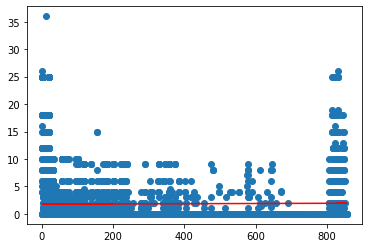

In [11]:
#plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.plot(X_train, regression.predict(X_train), color='red')

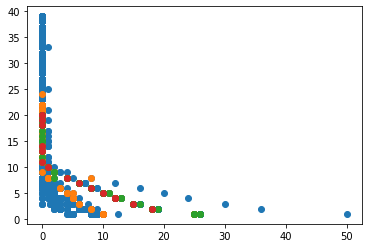

In [12]:
#Analyse des points gagnée en fonction de leur position de départ
plt.scatter(dataResult['points'], dataResult['positionOrder'])
plt.scatter(dataResultVettel['points'], dataResultVettel['positionOrder'])#vert
plt.scatter(dataResultLeclerc['points'], dataResultLeclerc['positionOrder'])#orange
plt.scatter(dataResultRaceLeclerc2020['points'], dataResultRaceLeclerc2020['positionOrder'])#rouge


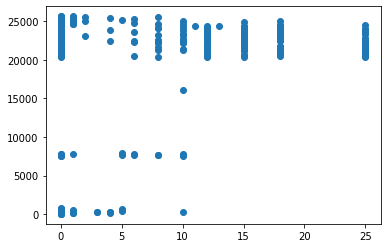

In [13]:
plt.scatter(dataResultVettel['points'], dataResultVettel['resultId'])

In [14]:
ecuries = constructors.merge(results,on = 'constructorId',how = 'left')
classementEcuries = ecuries[['name','points','raceId']]
classementEcuries = classementEcuries.groupby('name')['raceId'].nunique().sort_values(ascending = False).reset_index(name = 'races')
classementEcuries.head(20)

,name,races
0,Ferrari,1045
1,McLaren,874
2,Williams,788
3,Tyrrell,433
4,Renault,403
5,Team Lotus,395
6,Sauber,395
7,Minardi,345
8,Red Bull,339
9,Ligier,330


In [16]:
pointsTotauxEcuries = ecuries.groupby('name').agg({'points':'sum'}).sort_values('points',ascending = False).reset_index().head(20)
pointsTotauxEcuries

,name,points
0,Ferrari,9924.27
1,Mercedes,6726.64
2,McLaren,6085.50
3,Red Bull,6027.00
4,Williams,3593.00
5,Renault,1777.00
6,Force India,1098.00
7,Team Lotus,995.00
8,Benetton,861.50
9,Tyrrell,711.00


In [17]:
driver_position = drivers.merge(driver_standings,left_on='driverId',right_on='driverId',how = 'left')
driver_position = driver_position.merge(races,on = 'raceId',how = 'left')
driver_position

,driverId,driverRef,number,code,forename,surname,dob,nationality,url_x,driverStandingsId,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33688,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,71468.0,...,2022-06-17,18:00:00,2022-06-17,21:00:00,2022-06-18,17:00:00,2022-06-18,20:00:00,\N,\N
33689,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,71489.0,...,2022-07-01,12:00:00,2022-07-01,15:00:00,2022-07-02,11:00:00,2022-07-02,14:00:00,\N,\N
33690,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,71510.0,...,2022-07-08,11:30:00,2022-07-09,10:30:00,\N,\N,2022-07-08,15:00:00,2022-07-09,14:30:00
33691,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,71531.0,...,2022-07-22,12:00:00,2022-07-22,15:00:00,2022-07-23,11:00:00,2022-07-23,14:00:00,\N,\N


In [18]:
positions = driver_position[driver_position['position'] == 1].groupby(['surname','year'])['wins'].max().sort_values(ascending=False).reset_index(name = 'Victoire')
positions.head(20)
positions.year = positions.year.dt.year
positions.rename(columns={'surname':'Pilote'},inplace=True)
positions.rename(columns={'year':'Année'},inplace=True)

positions.Victoire = positions.Victoire.astype('int64')

positions.head(20)

,Pilote,Année,Victoire
0,Schumacher,2004,13
1,Vettel,2013,13
2,Hamilton,2019,11
3,Vettel,2011,11
4,Schumacher,2002,11
5,Hamilton,2020,11
6,Hamilton,2018,11
7,Hamilton,2014,11
8,Hamilton,2015,10
9,Verstappen,2021,10


In [19]:
#plotting a bubble chart
fig = px.scatter(positions.head(30), x="Année", y="Victoire", color="Pilote",title="Plus de victoire de grand-prix par saison par pilote",size = 'Victoire')
fig.update_traces(textfont_size=20,marker=dict(line=dict(color='#000000', width=2)))
fig.update_xaxes(showgrid=False)
fig.show()

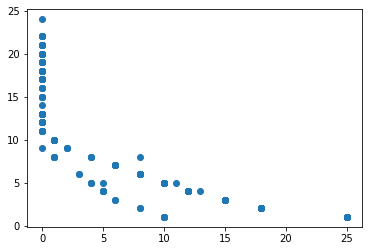

In [20]:
#On va maintenant se concentrer sur le pilote Vettel
dataResultVettel = results[results['driverId'] == 20] # On choisit le pilote Vettel
plt.scatter(dataResultVettel['points'], dataResultVettel['positionOrder'])#bleu


X_train shape : (247, 1)
y_train shape : (247,)
X_test shape : (44, 1)
y_test shape : (44,)


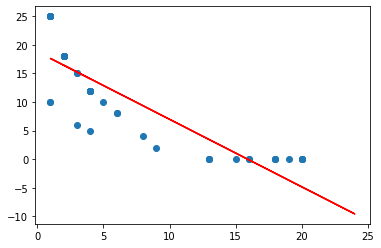

In [21]:
#Regression linéaire simple
dataResultRegressionSimple = dataResultVettel
dataResultRegressionSimple = dataResultRegressionSimple.replace(['\\N', 'F', 'R'], [0, 0, 0])
dataTemp = dataResultRegressionSimple.get(['positionOrder', 'points'])

X = dataTemp.iloc[:,:-1].values
Y = dataTemp.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15)
print("X_train shape : {}".format(X_train.shape))
print("y_train shape : {}".format(y_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("y_test shape : {}".format(y_test.shape))

regression = LinearRegression()
regression.fit(X_train, y_train)

#plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.plot(X_train, regression.predict(X_train), color='red')

In [22]:
dataEcuriesVettel = dataResultVettel.merge(constructors,left_on='constructorId',right_on='constructorId',how = 'left')
dataEcuriesVettel

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,name,nationality,url
0,20,18,20,5,15,9,\N,R,20,0.0,...,\N,\N,\N,\N,\N,4,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
1,40,19,20,5,15,15,\N,R,18,0.0,...,\N,37,14,1:36.870,205.995,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
2,66,20,20,5,15,19,\N,R,22,0.0,...,\N,\N,\N,\N,\N,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
3,88,21,20,5,15,18,\N,R,22,0.0,...,\N,\N,\N,\N,\N,4,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
4,105,22,20,5,15,14,17,17,17,0.0,...,\N,38,15,1:28.180,217.926,11,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,25577,1082,20,117,5,16,12,12,12,0.0,...,5826002,63,15,1:17.956,201.390,1,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...
287,25594,1083,20,117,5,18,9,9,9,2.0,...,8292667,52,10,1:32.471,229.343,1,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...
288,25622,1084,20,117,5,18,17,17,17,0.0,...,\N,62,15,1:10.001,222.065,11,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...
289,25636,1085,20,117,5,12,11,11,11,0.0,...,5466606,43,12,1:39.044,212.341,1,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...


In [23]:
dataEcuriesVettel.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'constructorRef', 'name', 'nationality',
       'url'],
      dtype='object')

In [24]:
dataEcuriesPointVettel = dataEcuriesVettel.groupby('name').agg({'points':'sum', 'raceId':'count'}).sort_values('points',ascending = False).reset_index().head(20)
dataEcuriesPointVettel

,name,points,raceId
0,Red Bull,1577.0,113
1,Ferrari,1400.0,119
2,Aston Martin,59.0,33
3,Toro Rosso,40.0,25
4,BMW Sauber,1.0,1


Mean MAE: 3.071 (0.487)


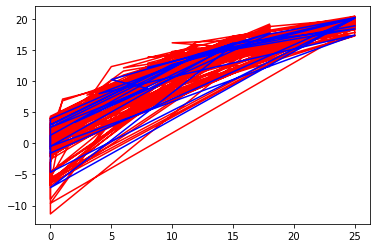

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import mean
from numpy import std

dataEcuriesVettelReplace = dataResultRegressionSimple.replace(['\\N', 'F', 'R', 'W', 'D'], [0, 0, 0, 0, 0])
dataEcuriesVettelReplace = dataEcuriesVettelReplace.drop('fastestLapTime', axis=1)
dataEcuriesVettelReplace = dataEcuriesVettelReplace.drop('time', axis=1)

X = dataEcuriesVettelReplace.drop('points', axis=1).values
y = dataEcuriesVettelReplace['points'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

model = linear_model.Lasso(alpha=1.0)
model.fit(X_train, y_train)
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

plt.plot(y_train, model.predict(X_train), color='red')
plt.plot(y_test, model.predict(X_test), color='blue')

plt.show()